### KNN in sklearn

### Imports needed

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from collections import Counter

In [3]:
dataset = datasets.load_breast_cancer()

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

In [5]:
clf = KNeighborsClassifier()

In [7]:
clf.fit(X_train, Y_train) # Bydefault k=n_neighbors=5

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
clf.score(X_test, Y_test)

0.9385964912280702

### By default k=5
### Now we want to find best k . For that we apply Cross Validation

In [21]:
x_axis = []
y_axis = []
best_k = 5 # initially
max_score = 0 # initially
for i in range(1,26,2): # check for k = odd values only
    clf = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(clf, X_train, Y_train, cv=KFold(3,random_state=0)).mean() 
    x_axis.append(i)
    y_axis.append(score)
    if score > max_score:
        max_score = score
        best_k = i
    
print("Value at optimal k is",best_k)

Value at optimal k is 9


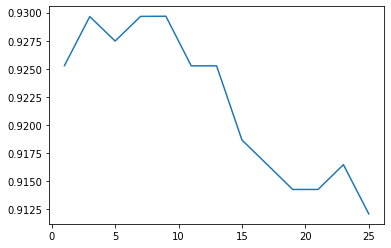

In [23]:
plt.plot(x_axis, y_axis)
plt.show()

### Now we find score of test data if n_neighbors used is 9 

In [24]:
clf = KNeighborsClassifier(n_neighbors=best_k) # best_k = 9 as calculated above

In [25]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [26]:
clf.score(X_test, Y_test)

0.9649122807017544

## Build KNN from scratch and then comapre score

In [27]:
def train(X_train, Y_train):
    return # Nothing to do during training

In [29]:
def predict_one(X_train, Y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = ((X_train[i,:]-x_test)**2).sum()
        distances.append([distance,i])
        
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(Y_train[index_of_training_data])
    
    return Counter(targets).most_common(1)[0][0]

In [32]:
def predict(X_train, Y_train, X_test, k):
    predictions = []
    for x_test in X_test:
        predictions.append(predict_one(X_train, Y_train, x_test,k))
    return predictions

### Call function

In [33]:
Y_pred = predict(X_train, Y_train, X_test, 9) # 9 bcz we calculated best_k as 9 above

In [34]:
accuracy_score(Y_test,Y_pred)

0.9649122807017544

In [35]:
# Its exactly same as we get by running inbuilt sklearn classifier